# Spruce tree type detection

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [7]:
data = pd.read_csv("dataset/Spruce.csv")

## 1. Exploratory Data Analysis (EDA)

In [8]:
print(data.head())  # Check first few rows
print(data['Tree_Type'].value_counts())  # Check class distribution

   Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      3                               258   
1       2590      2                               212   
2       2804      9                               268   
3       2785     18                               242   
4       2595      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Horizontal_Distance_To_Fire_Points  Soil_Type1  Soil_Type2  Soil_Type3  \
0                                6279           0           0           0   
1                                6225           0           0           0   
2    

### Visualize the class distribution

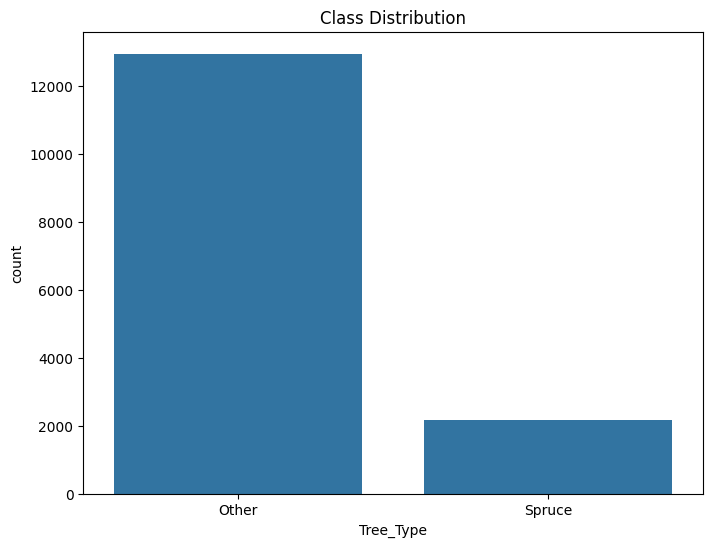

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tree_Type', data=data)
plt.title('Class Distribution')
plt.show()

### Check for missing values

In [10]:
print(data.isnull().sum())

Elevation                             0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Horizontal_Distance_To_Fire_Points    0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0
Soil_Type15                           0
Soil_Type16                           0
Soil_Type17                           0
Soil_Type18                           0
Soil_Type19                           0


## 2. Data Pre-processing
### Encode categorical variable 'Tree_Type'

In [11]:
label_encoder = LabelEncoder()
data['Tree_Type'] = label_encoder.fit_transform(data['Tree_Type'])

### Split the dataset into training and testing sets

In [12]:
X = data.drop('Tree_Type', axis=1)
y = data['Tree_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize/normalize data if necessary

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Identification of Target Concept
### Target variable: 'Tree_Type'

## 4. Selection and Parameterization of Learning Algorithms
### Initialize models

In [14]:
dt_classifier = DecisionTreeClassifier()
mlp_classifier = MLPClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

## 5. Training and Evaluation
### Train and evaluate models

In [15]:
classifiers = [dt_classifier, mlp_classifier, knn_classifier, svm_classifier]
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(type(clf).__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

DecisionTreeClassifier
Accuracy: 0.9136904761904762
Confusion Matrix:
 [[2463  140]
 [ 121  300]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2603
           1       0.68      0.71      0.70       421

    accuracy                           0.91      3024
   macro avg       0.82      0.83      0.82      3024
weighted avg       0.92      0.91      0.91      3024



c:\Users\Luis Alves\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier
Accuracy: 0.919973544973545
Confusion Matrix:
 [[2499  104]
 [ 138  283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2603
           1       0.73      0.67      0.70       421

    accuracy                           0.92      3024
   macro avg       0.84      0.82      0.83      3024
weighted avg       0.92      0.92      0.92      3024

KNeighborsClassifier
Accuracy: 0.9146825396825397
Confusion Matrix:
 [[2500  103]
 [ 155  266]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2603
           1       0.72      0.63      0.67       421

    accuracy                           0.91      3024
   macro avg       0.83      0.80      0.81      3024
weighted avg       0.91      0.91      0.91      3024



## 6. Results Comparison
### Visualize and compare results

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()